In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from xgboost import XGBClassifier
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import plot_importance

In [2]:
path = 'H:/work_projects/College/DM_Projects/course_project_3/odi_Matches_Data/man_odi_data_2.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head(3)

,Match Date,Team1 Name,Team1 Captain,Team2 Name,Team2 Captain,Match Venue (Stadium),Match Venue (City),Match Venue (Country),Toss Winner,Toss Winner Choice,Match Winner,Team1 Playing 11,Team2 Playing 11,Debut Players
0,07-01-1988,Australia,1572,New Zealand,1698,Melbourne Cricket Ground,Melbourne,Australia,Australia,bat,Australia,"['1767', '1793', '1754', '1572', '1871', '1795...","['1550', '1863', '1861', '1669', '1698', '1846...",[]
1,12-01-1988,New Zealand,1698,Sri Lanka,1664,Bellerive Oval,Hobart,Australia,Sri Lanka,bowl,Sri Lanka,"['1777', '1550', '1698', '1669', '1861', '1846...","['1810', '1864', '1789', '1762', '1666', '1664...",[]
2,17-01-1988,New Zealand,1698,Australia,1572,Brisbane Cricket Ground,Brisbane,Australia,Australia,bowl,Australia,"['1550', '1863', '1698', '1669', '1407', '1790...","['1793', '1767', '1773', '1754', '1871', '1795...",['1790']


In [5]:
df.columns

Index(['Match Date', 'Team1 Name', 'Team1 Captain', 'Team2 Name',
       'Team2 Captain', 'Match Venue (Stadium)', 'Match Venue (City)',
       'Match Venue (Country)', 'Toss Winner', 'Toss Winner Choice',
       'Match Winner', 'Team1 Playing 11', 'Team2 Playing 11',
       'Debut Players'],
      dtype='object')

In [51]:
player_list = set([])
for cell in df['Team1 Playing 11']:
    lst = cell.strip("[]").replace("'", "").replace(' ', '').split(',')
    lst = [int(x) for x in lst]
    for player in lst:
        player_list.add(player)
player_list = list(player_list)
player_list

[8192,
 8195,
 8197,
 8201,
 8203,
 8209,
 90143,
 49193,
 8240,
 8242,
 90165,
 57410,
 49222,
 8270,
 8272,
 8273,
 49236,
 49247,
 57444,
 90231,
 8334,
 73871,
 24723,
 49327,
 49342,
 24777,
 106697,
 49401,
 57609,
 8460,
 57628,
 106787,
 65860,
 65861,
 65862,
 74145,
 65996,
 8742,
 8762,
 74305,
 49752,
 8813,
 74351,
 8821,
 57982,
 66190,
 8876,
 58084,
 49899,
 49906,
 58100,
 8962,
 49945,
 49958,
 8999,
 9022,
 66371,
 58190,
 66398,
 9086,
 74633,
 58274,
 58276,
 50121,
 58346,
 74741,
 9235,
 58403,
 58406,
 58408,
 9257,
 9266,
 9268,
 9269,
 58435,
 1105,
 58466,
 50281,
 50290,
 58488,
 58491,
 50309,
 1160,
 58511,
 74913,
 66722,
 66725,
 66726,
 74917,
 1215,
 50377,
 50378,
 50388,
 1237,
 1239,
 9432,
 1243,
 74975,
 1250,
 1251,
 1259,
 1260,
 50416,
 1265,
 1266,
 1277,
 1278,
 1287,
 1290,
 1291,
 1298,
 1299,
 9492,
 1304,
 66842,
 1307,
 66844,
 1311,
 9505,
 1319,
 66859,
 1324,
 1326,
 1328,
 1329,
 50483,
 1336,
 1337,
 1338,
 1341,
 1342,
 1346,
 1347

In [52]:
len(player_list)

1256

In [53]:
player_list = set([])
for cell in df['Team2 Playing 11']:
    lst = cell.strip("[]").replace("'", "").replace(' ', '').split(',')
    lst = [int(x) for x in lst]
    for player in lst:
        player_list.add(player)
player_list = list(player_list)
len(player_list)

2179

In [5]:
winner = []
for match_win, team_one in zip(df['Match Winner'], df['Team1 Name']):
    if match_win == team_one:
        winner.append(0)
    else:
        winner.append(1)

In [6]:
df['match_winner'] = winner

In [7]:
df = df.drop(columns=['Match Winner', 'Toss Winner'], axis=1)

In [8]:
df = df.drop(columns=['Debut Players', 'Team1 Playing 11', 'Team2 Playing 11'], axis=1)

In [9]:
df = df.drop(columns=['Match Date'], axis=1)

In [10]:
df.dtypes

Team1 Name               object
Team1 Captain             int64
Team2 Name               object
Team2 Captain             int64
Match Venue (Stadium)    object
Match Venue (City)       object
Match Venue (Country)    object
Toss Winner Choice       object
match_winner              int64
dtype: object

In [11]:
df = pd.get_dummies(data=df, columns=['Team1 Name', 'Team1 Captain', 'Team2 Name', 'Team2 Captain', 'Match Venue (Stadium)', 
                       'Match Venue (City)', 'Match Venue (Country)', 'Toss Winner Choice'])

In [12]:
df.columns

Index(['match_winner', 'Team1 Name_Afghanistan', 'Team1 Name_Australia',
       'Team1 Name_India', 'Team1 Name_New Zealand', 'Team1 Name_Pakistan',
       'Team1 Name_South Africa', 'Team1 Name_Sri Lanka', 'Team1 Captain_1105',
       'Team1 Captain_1237',
       ...
       'Match Venue (Country)_Qatar', 'Match Venue (Country)_Scotland',
       'Match Venue (Country)_Singapore', 'Match Venue (Country)_South Africa',
       'Match Venue (Country)_Sri Lanka',
       'Match Venue (Country)_United Arab Emirates',
       'Match Venue (Country)_West Indies', 'Match Venue (Country)_Zimbabwe',
       'Toss Winner Choice_bat', 'Toss Winner Choice_bowl'],
      dtype='object', length=798)

In [13]:
x = df.drop(columns=['match_winner'], axis=1)
y = df['match_winner']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [14]:
df.dtypes

match_winner                                  int64
Team1 Name_Afghanistan                         bool
Team1 Name_Australia                           bool
Team1 Name_India                               bool
Team1 Name_New Zealand                         bool
                                              ...  
Match Venue (Country)_United Arab Emirates     bool
Match Venue (Country)_West Indies              bool
Match Venue (Country)_Zimbabwe                 bool
Toss Winner Choice_bat                         bool
Toss Winner Choice_bowl                        bool
Length: 798, dtype: object

In [15]:
model = XGBClassifier()
model.fit(x_train, y_train)

c:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [16]:
predictions = model.predict(x_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       370
           1       0.63      0.60      0.61       340

    accuracy                           0.64       710
   macro avg       0.64      0.64      0.64       710
weighted avg       0.64      0.64      0.64       710



c:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

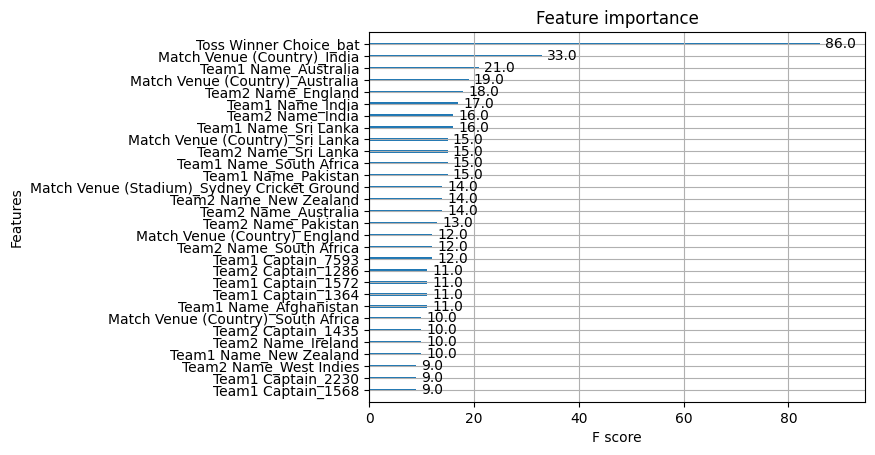

In [17]:
plot_importance(model, max_num_features = 30)